# 📘 Class 17 – Introduction to Support Vector Machines (SVM)
**Duration:** 2 Hours

### 🎯 Objective
By the end of this lesson, you will understand how Support Vector Machines (SVM) work for classification tasks, including:
- Linear and Non-linear classification
- Kernels and their usage
- Concepts of hyperplanes and margins

## 1. 📌 Introduction to Support Vector Machines
Support Vector Machines (SVMs) are supervised learning algorithms used mainly for classification. They work by finding the best boundary (called a **hyperplane**) that separates classes of data. SVM tries to find a hyperplane that best divides the data into classes by maximizing the margin between the classes.


### 🧠 Key Concepts:
- **Hyperplane**: A hyperplane is a decision boundary that separates different classes. In a 2D space, it’s a line, and in higher dimensions, it’s a plane or hyperplane. Think of a wall that separates two groups in a room.
- **Margin**: The margin is the distance between the hyperplane and the closest data points from each class (known as support vectors). SVM aims to maximize this margin for better generalization. The space between the wall (hyperplane) and the nearest object (support vectors).
- **Support Vectors**: Data points that are closest to the hyperplane and influence its position.
- **Kernels**: Techniques that help SVM deal with non-linear data by transforming it into a higher-dimensional space.

Non-linear Classification (Kernels):


SVM can also handle non-linearly separable data by using kernels to transform the data into higher dimensions where it becomes linearly separable.


Common kernels:


Linear Kernel: For linearly separable data.


Polynomial Kernel: For data that requires a polynomial decision boundary.


RBF Kernel (Radial Basis Function): For complex non-linear data, it maps data to an infinite-dimensional space.


## 2. ⚙️ How SVM Works
### Linear SVM
Linear SVM tries to find the best straight line (or plane) to separate data.
Finds the hyperplane that best separates the data by maximizing the margin. It uses support vectors (the closest data points) to define the margin.


### Non-linear SVM
If the data cannot be separated by a straight line, we use **Kernels** to transform it into a space where it can be.
When data is not linearly separable, SVM uses kernel functions to map the data into a higher-dimensional space where a linear hyperplane can be found.

## 3. 💻 Implementing SVM with Scikit-Learn (Linear Kernel)

### 📦 Step 1: Import Libraries
We import libraries like pandas, matplotlib, and sklearn for loading, processing, and modeling the dataset.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

### 📊 Step 2: Load Dataset
We are using the **Breast Cancer Dataset**, which contains features of tumors and the goal is to classify them as malignant or benign.

In [3]:
# Load the dataset
data = pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
data.shape

(569, 32)

### 🧹 Step 3: Preprocess the Data
We separate the features (X) and the target variable (y).

In [11]:
X = data.drop(['diagnosis'], axis=1)
y = data['diagnosis']

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

### ✂️ Step 4: Split the Data into Train and Test
We split the data so the model can learn on one part and we can test it on another.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

### 🤖 Step 5: Create SVM Model with Linear Kernel

In [15]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

### 📈 Step 6: Make Predictions

In [16]:
y_pred = svm_model.predict(X_test)

### 🧪 Step 7: Evaluate the Model
We check how well the model did using accuracy and classification metrics.

In [17]:
accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy: ", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

SVM Accuracy:  0.9766081871345029
Classification Report:
               precision    recall  f1-score   support

           B       0.98      0.98      0.98       108
           M       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



### 📊 Step 8: Visualize the Confusion Matrix

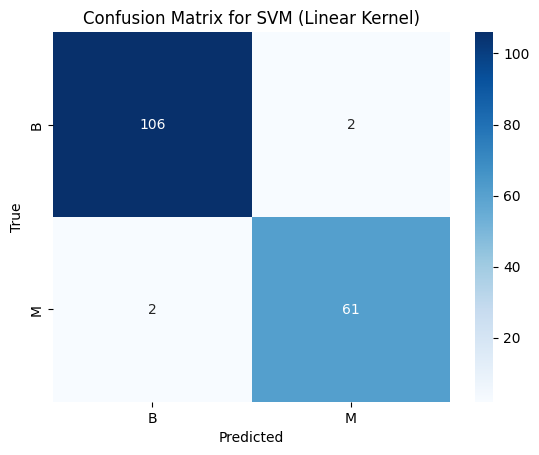

In [18]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for SVM (Linear Kernel)')
plt.show()

## 4. 🌌 Understanding the Impact of Kernels – RBF Kernel

In [20]:
# Model Training
svm_rbf_model = SVC(kernel='rbf')
svm_rbf_model.fit(X_train, y_train)

SVC()

In [21]:
# Model Prediction
y_rbf_pred = svm_rbf_model.predict(X_test)

In [22]:
# Model Evaluation
accuracy_rbf = accuracy_score(y_test, y_rbf_pred)
print("SVM with RBF Kernel Accuracy: ", accuracy_rbf)
print("Classification Report:\n", classification_report(y_test, y_rbf_pred))

SVM with RBF Kernel Accuracy:  0.9766081871345029
Classification Report:
               precision    recall  f1-score   support

           B       0.98      0.98      0.98       108
           M       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



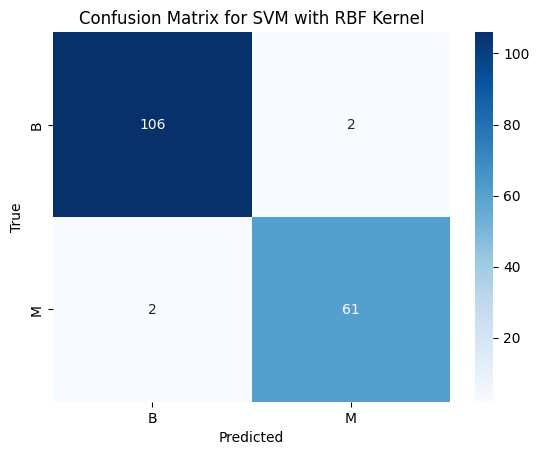

In [23]:
cm_rbf = confusion_matrix(y_test, y_rbf_pred)
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Blues', xticklabels=svm_rbf_model.classes_, yticklabels=svm_rbf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for SVM with RBF Kernel')
plt.show()

## 5. 🖼️ Visualizing SVM Decision Boundaries (2D)

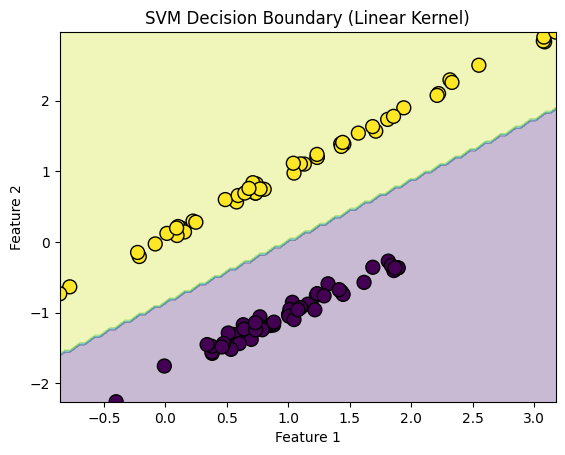

In [25]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Generate a simple 2D dataset with 2 informative features and no redundant/repeated ones
X_vis, y_vis = make_classification(n_samples=100, 
                                   n_features=2, 
                                   n_informative=2, 
                                   n_redundant=0, 
                                   n_repeated=0,
                                   n_classes=2, 
                                   n_clusters_per_class=1, 
                                   random_state=42)

# Train the SVM model
svm_vis_model = SVC(kernel='linear')
svm_vis_model.fit(X_vis, y_vis)

# Create a mesh grid for plotting decision boundary
xx, yy = np.meshgrid(np.linspace(X_vis[:, 0].min(), X_vis[:, 0].max(), 100),
                     np.linspace(X_vis[:, 1].min(), X_vis[:, 1].max(), 100))

# Predict class for each point in the grid
Z = svm_vis_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and points
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, edgecolors='k', s=100)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary (Linear Kernel)')
plt.show()


## 6. 🔍 Comparison of Linear vs. Non-Linear SVM


| Feature            | Linear SVM                     | Non-Linear SVM (Kernel)        |
|--------------------|--------------------------------|--------------------------------|
| Suitable for       | Linearly separable data        | Non-linearly separable data    |
| Transformation     | Not required                   | Required using kernel tricks   |
| Kernel             | Linear                         | RBF, Polynomial, Sigmoid       |
| Speed              | Faster                         | Slower due to transformation   |

➡️ **Activity Suggestion**: Try training SVM with different kernels on the same dataset and observe the accuracy.
